In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
import plotly
from chart_studio import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from wordcloud import WordCloud
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster import hierarchy as sch
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import plot as off
import plotly.io as pio


In [2]:
df = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\Association rules\my_movies.csv")

In [3]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


## Data Exploration

In [119]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,clusterid_new
0,1,0,1,1,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,1


In [5]:
#checking information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [53]:
# most popular items
count = df1.iloc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [11]:
#checking for values of each movies
for i in df1.columns:
    print(i)
    print(df1[i].value_counts())
    print()

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



In [12]:
print('the most watched movies are {}'.format(df1.columns))
print('the count of watched movies are {}'.format(df1.columns.size))

the most watched movies are Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')
the count of watched movies are 10


## Visualizations

In [152]:
df2 = df1.iloc[:,0:10]

In [155]:
#visualization the percent of sales of books 
px.pie(df2,values=df2.sum(),names=df2.columns
      ,title='Top Viewed movies Percentage',
      color_discrete_sequence=px.colors.sequential.speed_r,
      hover_name=df2.columns,hole=0.5)



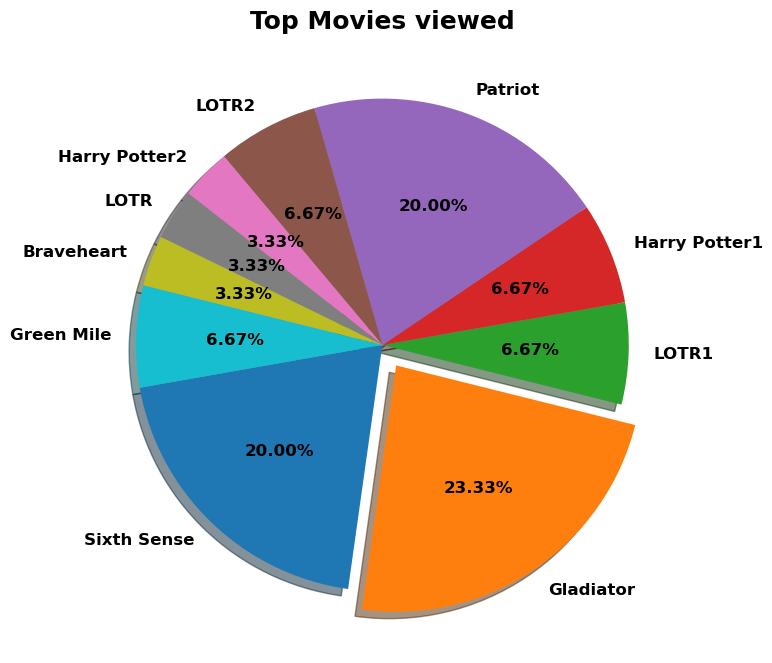

In [164]:
plt.figure(figsize = (12,8))
plt.pie(df2.sum(),
       labels=df2.columns,
       explode = [0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top Movies viewed", fontsize = 18, fontweight = 'bold')
plt.show()


We can  observe that people have viewed gladiator followed by Sixth Sense and Patriot, we can understand that people have some kind of association with these three movies that people are attracted,the least viewed are Braveheart followed by LOTR and Harry Potter 2

In [165]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


In [61]:
#visualizing the rate of purchase by barplot 
px.bar(x=df1.columns,y=count,text=df1.sum(),color=count,
      title= 'Customers Viewed Movies',color_continuous_scale='haline',hover_name=df1.columns,orientation='v',)

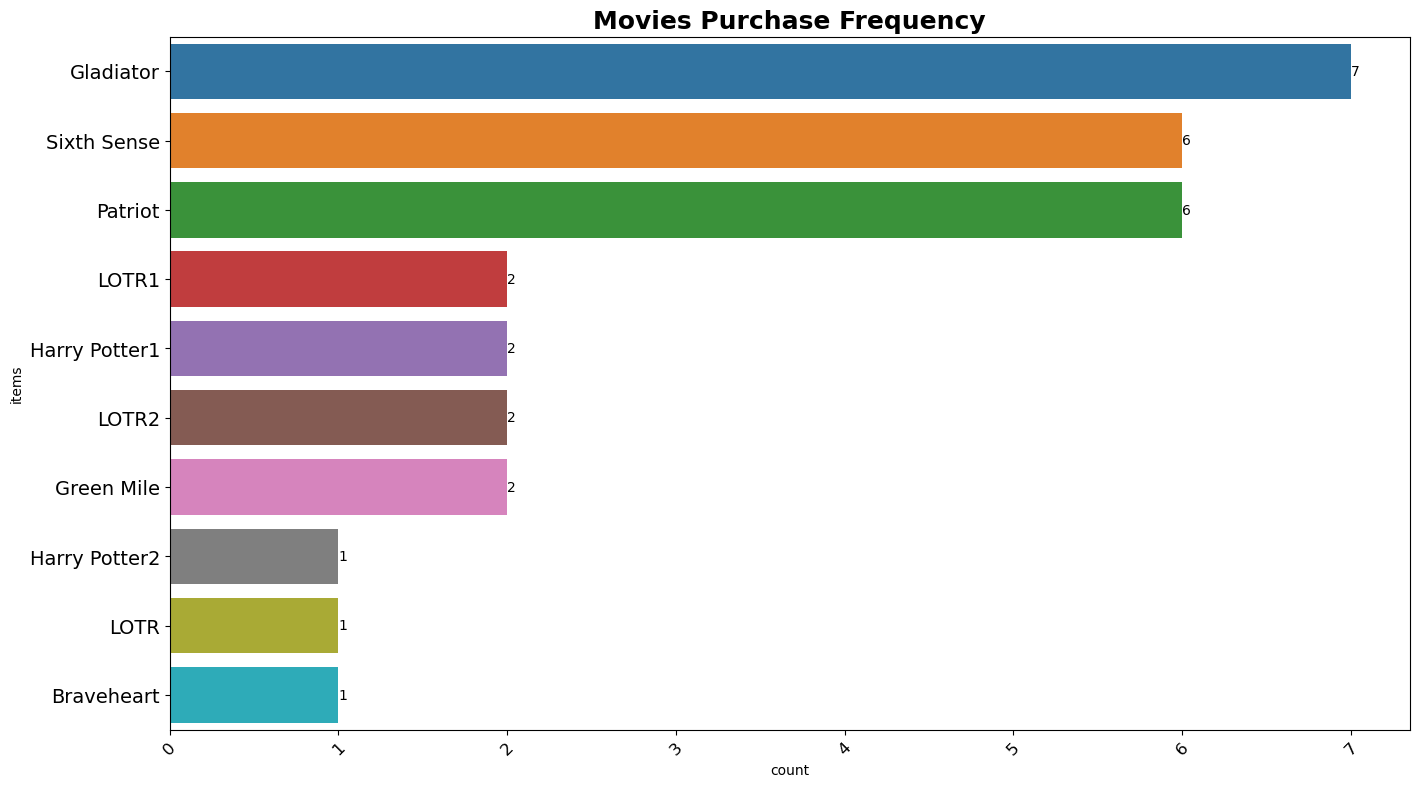

In [169]:
plt.figure(figsize = (16,9))
ax = sn.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Movies Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

According to Barplot we have observed that people have responded to gladiator followed by Sixth Sense and Patriot

## Apriori Algorithm

In [67]:
#fitting our support at 20%
freq_movies = apriori(df1,min_support= 0.2,use_colnames=True)
freq_movies

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [68]:
#fitting our association rule with confidence 75%
rules_1 = association_rules(freq_movies,metric='lift',min_threshold=0.75)
rules_1.sort_values('lift',ascending=False)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [69]:
rules_1[rules_1.lift>=1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [70]:
#checking for association of items at 75% confidence
rules_1[rules_1.confidence>=0.75]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


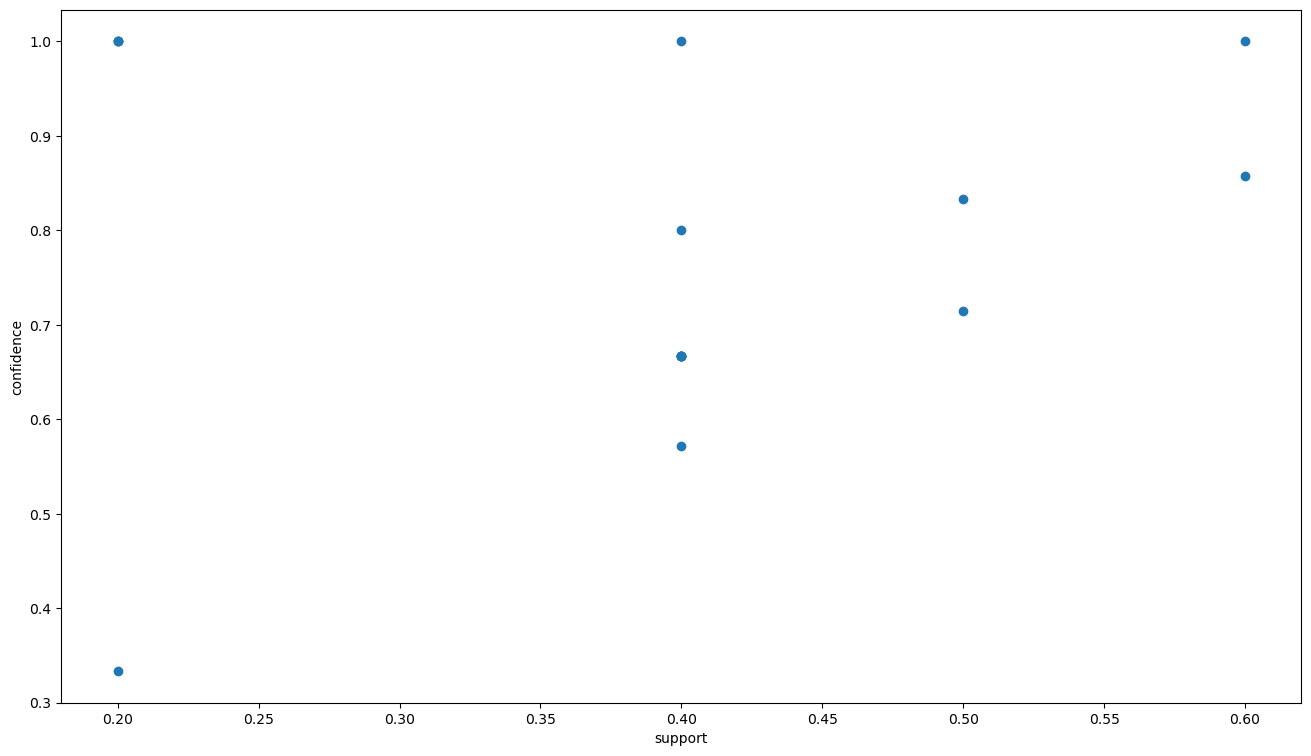

In [75]:
# visualization of obtained rule 1
plt.figure(figsize=(16,9))
plt.scatter(rules_1['support'],rules_1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

We can conclude that at 20% support and 75% confidence we observe that people who are watching Gladiator are also interested in Sixth sense,Patriot and green mile,so we can suggest them to watch these movies too or link their interest about these movies

In [76]:
#fitting our support with 10%
freq_movies_2 = apriori(df1,min_support=0.1,use_colnames=True)
freq_movies_2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [78]:
#fitting our association rule with confidence 80%
rules_2 = association_rules(freq_movies_2,metric='lift',min_threshold=0.80)
rules_2.sort_values('lift',ascending=False)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(LOTR1),"(Green Mile, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(Green Mile, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Green Mile),"(LOTR1, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [79]:
rules_2[rules_2.lift>=1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
241,(LOTR1),"(Green Mile, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(Green Mile, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Green Mile),"(LOTR1, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [94]:
#checking for association of items at 80% confidence
rules_2[rules_2.confidence>=0.80]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
14,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
15,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
235,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
236,"(Green Mile, Harry Potter1)","(LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
237,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
238,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


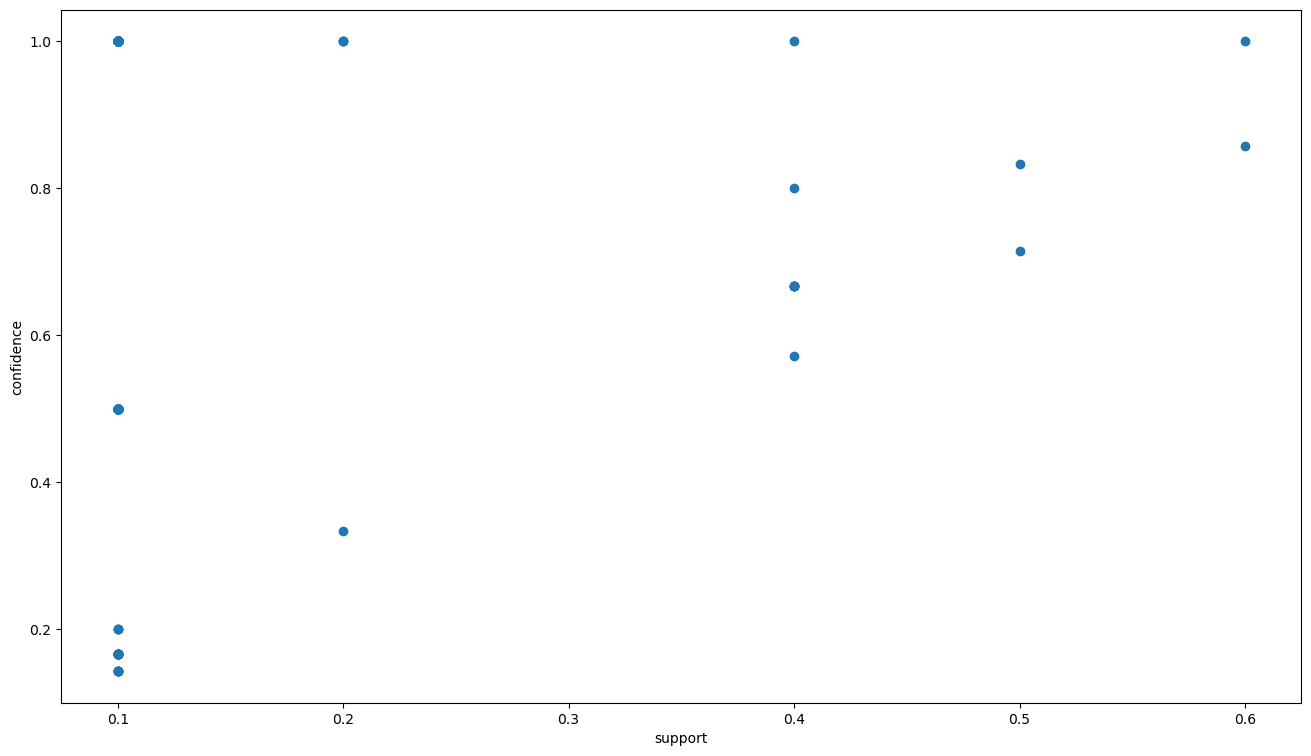

In [81]:
# visualization of obtained rule 2
plt.figure(figsize=(16,9))
plt.scatter(rules_2['support'],rules_2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

With 10% support and 80% confidence we can say that people who are watching sixth sense and gladiator will also watch Patriot and people who are watching LOTR1 will also like LOTR2, so for them we can suggest or reccomend to watch green mile and sixth sense 

In [83]:
#fitting our support at 5% support and 90% confidence
freq_movies_3 = apriori(df1,min_support=0.05,use_colnames=True)
freq_movies_3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [84]:
#fitting our association rule with confidence 90%
rules_3 = association_rules(freq_movies_3,metric='lift',min_threshold=0.9)
rules_3.sort_values('lift',ascending=False,inplace=True)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
222,"(Green Mile, LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
201,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
198,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
220,"(Harry Potter1, LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
219,"(Green Mile, Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
45,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


In [85]:
rules_3[rules_3.lift>=1.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
222,"(Green Mile, LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
201,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
198,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
220,"(Harry Potter1, LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
219,"(Green Mile, Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
152,"(Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
89,"(Gladiator, Braveheart)",(Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
88,"(Gladiator, Patriot)",(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
87,(Sixth Sense),"(Green Mile, LOTR)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [93]:
#checking for association of items at 80% confidence
rules_3[rules_3.confidence>=0.9]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
222,"(Green Mile, LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
201,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
198,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
220,"(Harry Potter1, LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
219,"(Green Mile, Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
13,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
95,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
34,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf
90,"(Patriot, Braveheart)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf


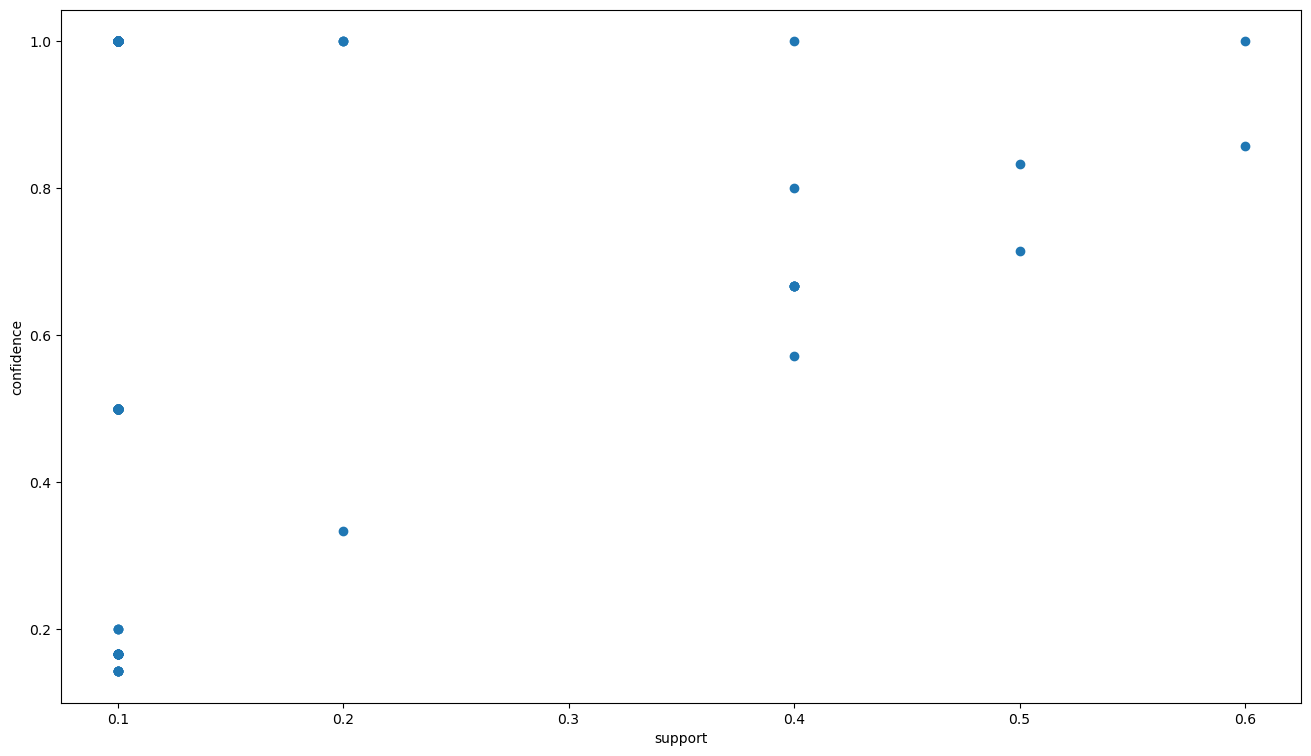

In [173]:
# visualization of obtained rule 3
plt.figure(figsize=(16,9))
plt.scatter(rules_3['support'],rules_3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

With 5% support and 90% confidence We can observe that people who are watching Green Mile, LOTR2, Sixth Sense have their interests in LOTR1, Harry Potter1 and people who are watching Patriot, Braveheart can be given suggestion of Gladiator.


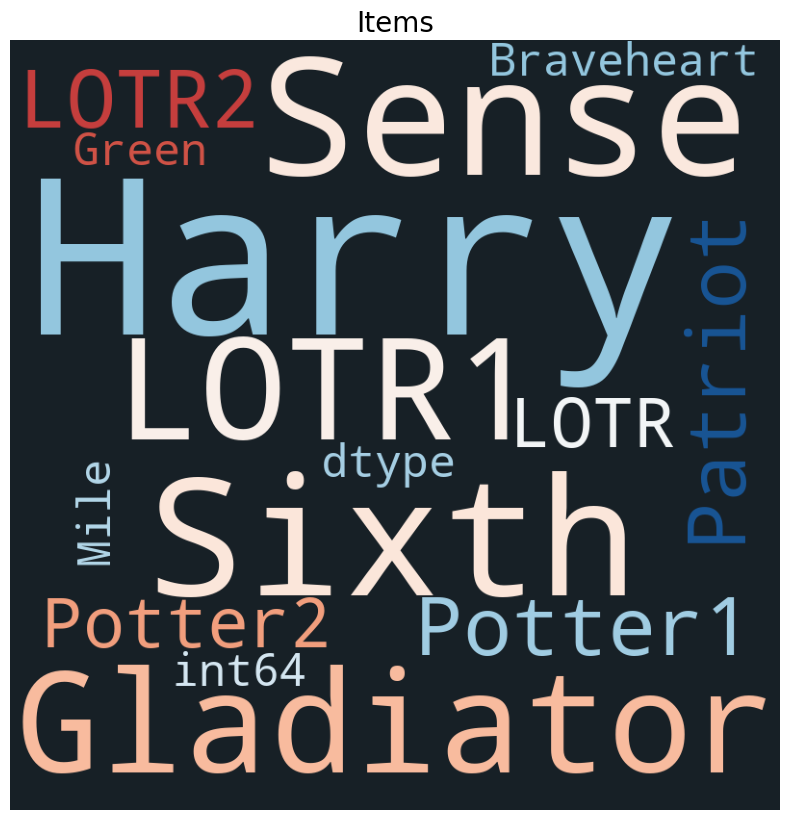

In [95]:
#wordcloud to just see the most frequent types of books 
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = '#172026',colormap='RdBu_r' ,width = 800,  height = 800, max_words = 121).generate(str(df1.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

## Clustering for customers vision

### KMeans

In [96]:
#elbow method for determining the K value 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

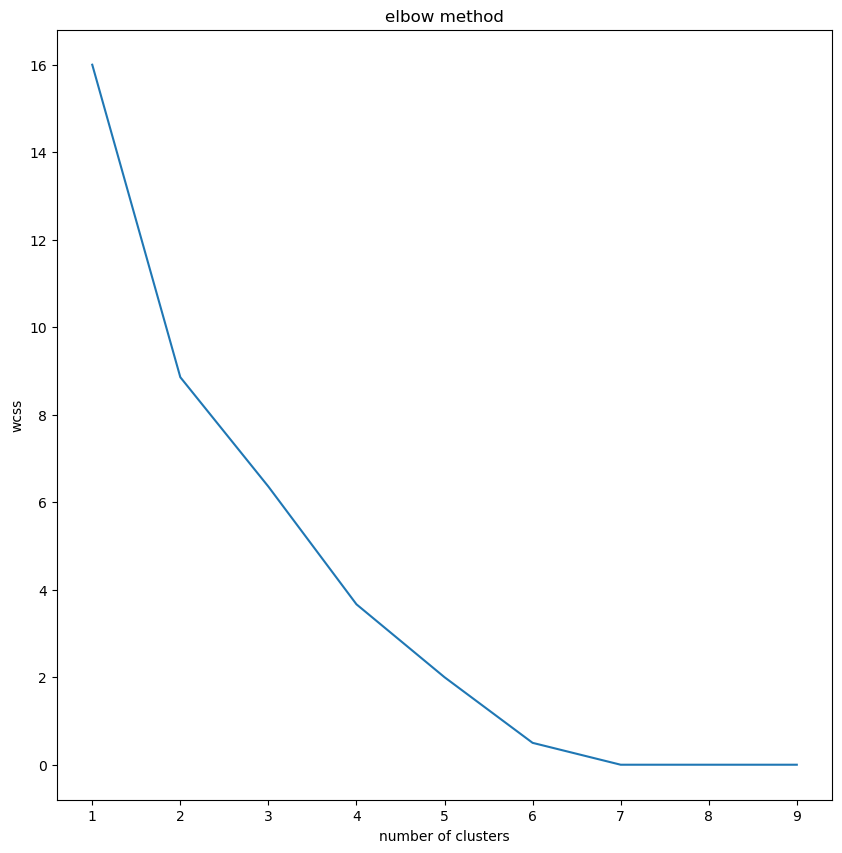

In [97]:
#plotting the slbow graph 
plt.plot(range(1,10),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [98]:
clusters_new = KMeans(3, random_state= 100)
clusters_new.fit(df1)

KMeans(n_clusters=3, random_state=100)

In [99]:
clusters_new.labels_

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 2])

In [101]:
df1['clusterid_new'] = clusters_new.labels_
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,clusterid_new
0,1,0,1,1,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,1


In [102]:
clusters_new.cluster_centers_

array([[3.33333333e-01, 1.11022302e-16, 6.66666667e-01, 6.66666667e-01,
        1.11022302e-16, 6.66666667e-01, 3.33333333e-01, 0.00000000e+00,
        0.00000000e+00, 3.33333333e-01],
       [6.66666667e-01, 1.00000000e+00, 2.77555756e-17, 2.77555756e-17,
        1.00000000e+00, 2.77555756e-17, 1.38777878e-17, 1.38777878e-17,
        1.66666667e-01, 2.77555756e-17],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00]])

In [103]:
df1[df1['clusterid_new']==0]

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,clusterid_new
0,1,0,1,1,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0,0


In [104]:
df1[df1['clusterid_new']==1]

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,clusterid_new
1,0,1,0,0,1,0,0,0,1,0,1
3,1,1,0,0,1,0,0,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,1
5,1,1,0,0,1,0,0,0,0,0,1
7,0,1,0,0,1,0,0,0,0,0,1
8,1,1,0,0,1,0,0,0,0,0,1


In [105]:
df1[df1['clusterid_new']==2]

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,clusterid_new
9,1,1,0,0,0,0,0,1,0,1,2


In [106]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.333333,0.0,0.666667,0.666667,0.0,0.666667,0.333333,0.0,0.000000,0.333333
1,1,0.666667,1.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.166667,0.000000
2,2,1.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,1.000000


Conclusion with clustering 

1)In the first cluster we observe that people who have Harry potter1 also have viewed LOTR2,HarryPotter2,followed by GreenMile and sixth Sense,these people have not taken much interest in gladiator,patriot or LOTR

2)In the second cluster people who have watched gladiator have also gone for patriot and with sixth sense,people have shown less interest in braveheart and other titles 

3)In the third cluster we observe that people who have gone for Sixth sense have also watched gladiator followed by LOTR and greenmile, this tells us that people who havent engaged with other titles,suggestions can be given 


Conclusion with Association Rules

1)With 20% support and 75% confidence we observe that people who have viewed Sixth Sense can also have preferred to go with Gladiator and Patriot but most have gone with dual combination of sixth Sense and gladiiator

2)With 10% support and 80% confidence we observed that people who have viewed LOTR1 can also have preferred Green Mile, Harry Potter1, LOTR2 and Sixth Sense but the most preferred are dual combination of gladiator and Patriot

3)With 5% support and 90% confidence we observe that people who have viewed Green Mile, LOTR2, Sixth Sense can also preferred to go for LOTR1, Harry Potter1,and most of the people have this association in abundance.